### 1) Write a function to calculate Manhattan distance, Euclidean distance and L-infinity norm between same size RGB images.

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image_1 = cv2.imread("/home/nalin/Downloads/Sample.jpeg")
image_2 = cv2.imread("/home/nalin/Downloads/Sample1.jpg")
image_1 =cv2.resize(image_1,(300,300))
image_2 =cv2.resize(image_2,(300,300))
def calculate_distances(image_1, image_2):
    manhattan_distance = np.sum(np.abs(image_1 - image_2))
    
    euclidean_distance = np.sqrt(np.sum((image_1 - image_2) ** 2))
    
    linf_distance = np.max(np.abs(image_1 - image_2))
    
    return manhattan_distance, euclidean_distance, linf_distance

manhattan, euclidean, linf = calculate_distances(image_1, image_2)

print(f"Manhattan Distance: {manhattan}")
print(f"Euclidean Distance: {euclidean}")
print(f"L-infinity Norm: {linf}")


Manhattan Distance: 39420882
Euclidean Distance: 5372.148545973017
L-infinity Norm: 255


### 2) Take two same size images, Binarize the image using some threshold, Now apply logical operations on them.

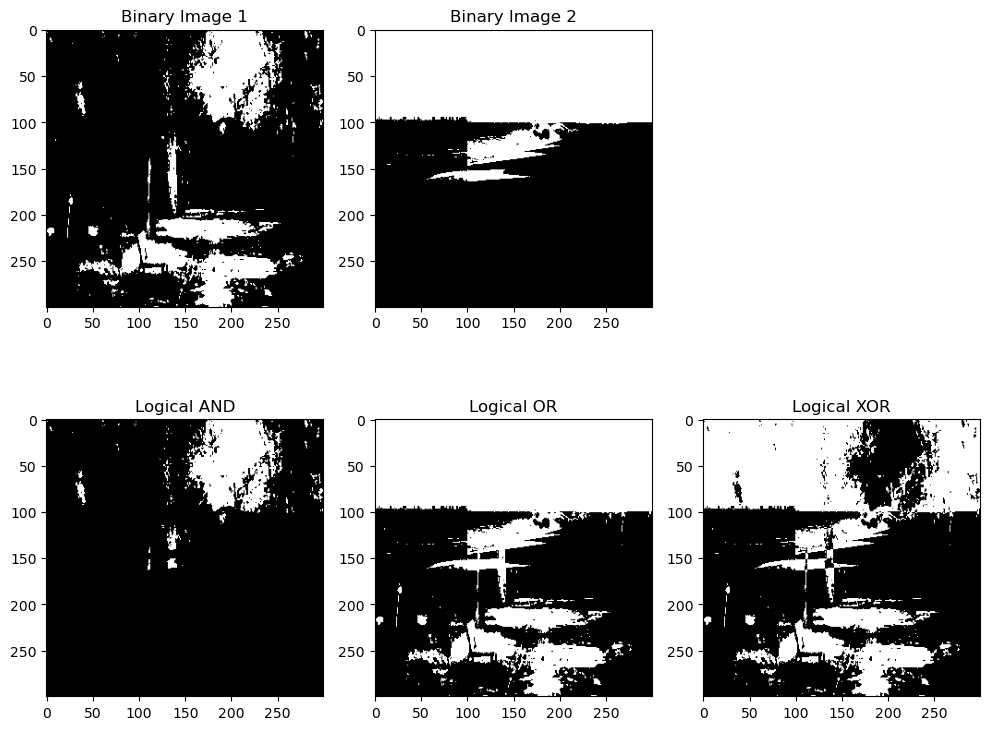

In [28]:
image_1 = cv2.imread("/home/nalin/Downloads/Sample.jpeg", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("/home/nalin/Downloads/Sample1.jpg", cv2.IMREAD_GRAYSCALE)
#image_1 = cv2.imread("/home/nalin/Downloads/Sample.jpeg")
#image_2 = cv2.imread("/home/nalin/Downloads/Sample1.jpg")


image_1 = cv2.resize(image_1, (300, 300))
image_2 = cv2.resize(image_2, (300, 300))

_, binary_image_1 = cv2.threshold(image_1, 128, 255, cv2.THRESH_BINARY)
_, binary_image_2 = cv2.threshold(image_2, 128, 255, cv2.THRESH_BINARY)

logical_and = cv2.bitwise_and(binary_image_1, binary_image_2)
logical_or = cv2.bitwise_or(binary_image_1, binary_image_2)
logical_xor = cv2.bitwise_xor(binary_image_1, binary_image_2)

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title("Binary Image 1")
plt.imshow(binary_image_1, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Binary Image 2")
plt.imshow(binary_image_2, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Logical AND")
plt.imshow(logical_and, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Logical OR")
plt.imshow(logical_or, cmap='gray')

plt.subplot(2, 3, 6)
plt.title("Logical XOR")
plt.imshow(logical_xor, cmap='gray')

plt.tight_layout()
plt.show()


### 3) Take two images, apply arithmetic operations on them. Take care of out of bound values and zero division errors.

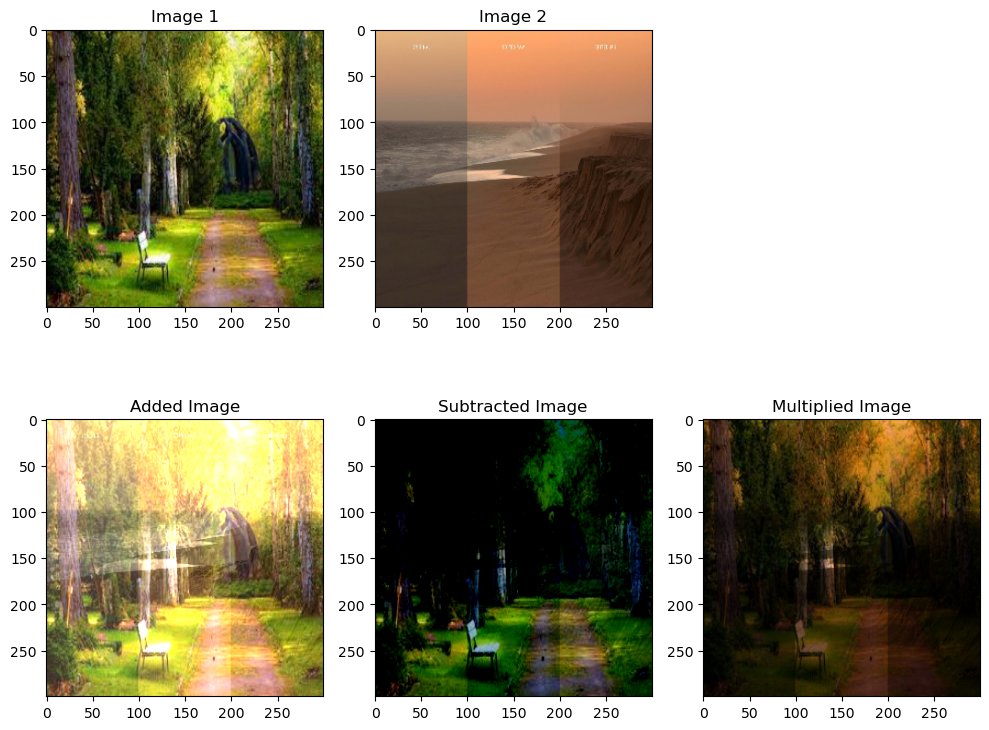

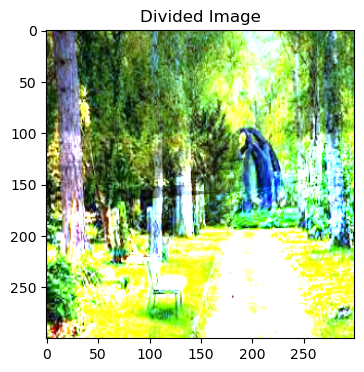

In [29]:
image_1 = cv2.imread("/home/nalin/Downloads/Sample.jpeg")
image_2 = cv2.imread("/home/nalin/Downloads/Sample1.jpg")

image_1 = cv2.resize(image_1, (300, 300))
image_2 = cv2.resize(image_2, (300, 300))

image_1 = image_1.astype(np.float32)
image_2 = image_2.astype(np.float32)

# 1. Addition
added_image = cv2.add(image_1, image_2)
added_image = np.clip(added_image, 0, 255).astype(np.uint8)

# 2. Subtraction
subtracted_image = cv2.subtract(image_1, image_2)
subtracted_image = np.clip(subtracted_image, 0, 255).astype(np.uint8)

# 3. Multiplication
multiplied_image = cv2.multiply(image_1, image_2) / 255
multiplied_image = np.clip(multiplied_image, 0, 255).astype(np.uint8)

# 4. Division
image_2_no_zeros = np.where(image_2 == 0, 1, image_2)
divided_image = cv2.divide(image_1, image_2_no_zeros)
divided_image = np.clip(divided_image * 255, 0, 255).astype(np.uint8)  

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title("Image 1")
plt.imshow(cv2.cvtColor(image_1.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title("Image 2")
plt.imshow(cv2.cvtColor(image_2.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.title("Added Image")
plt.imshow(cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 5)
plt.title("Subtracted Image")
plt.imshow(cv2.cvtColor(subtracted_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 6)
plt.title("Multiplied Image")
plt.imshow(cv2.cvtColor(multiplied_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
plt.title("Divided Image")
plt.imshow(cv2.cvtColor(divided_image, cv2.COLOR_BGR2RGB))
plt.show()
